<a href="https://colab.research.google.com/github/slachitoff/CS-GY-6613-Assignments/blob/main/CS_GY_6613_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1000000 non-null  float64
 1   click             1000000 non-null  int64  
 2   hour              1000000 non-null  int64  
 3   C1                1000000 non-null  int64  
 4   banner_pos        1000000 non-null  int64  
 5   site_id           1000000 non-null  object 
 6   site_domain       1000000 non-null  object 
 7   site_category     1000000 non-null  object 
 8   app_id            1000000 non-null  object 
 9   app_domain        1000000 non-null  object 
 10  app_category      1000000 non-null  object 
 11  device_id         1000000 non-null  object 
 12  device_ip         1000000 non-null  object 
 13  device_model      1000000 non-null  object 
 14  device_type       1000000 non-null  int64  
 15  device_conn_type  1000000 non-null  int64  
 16  C

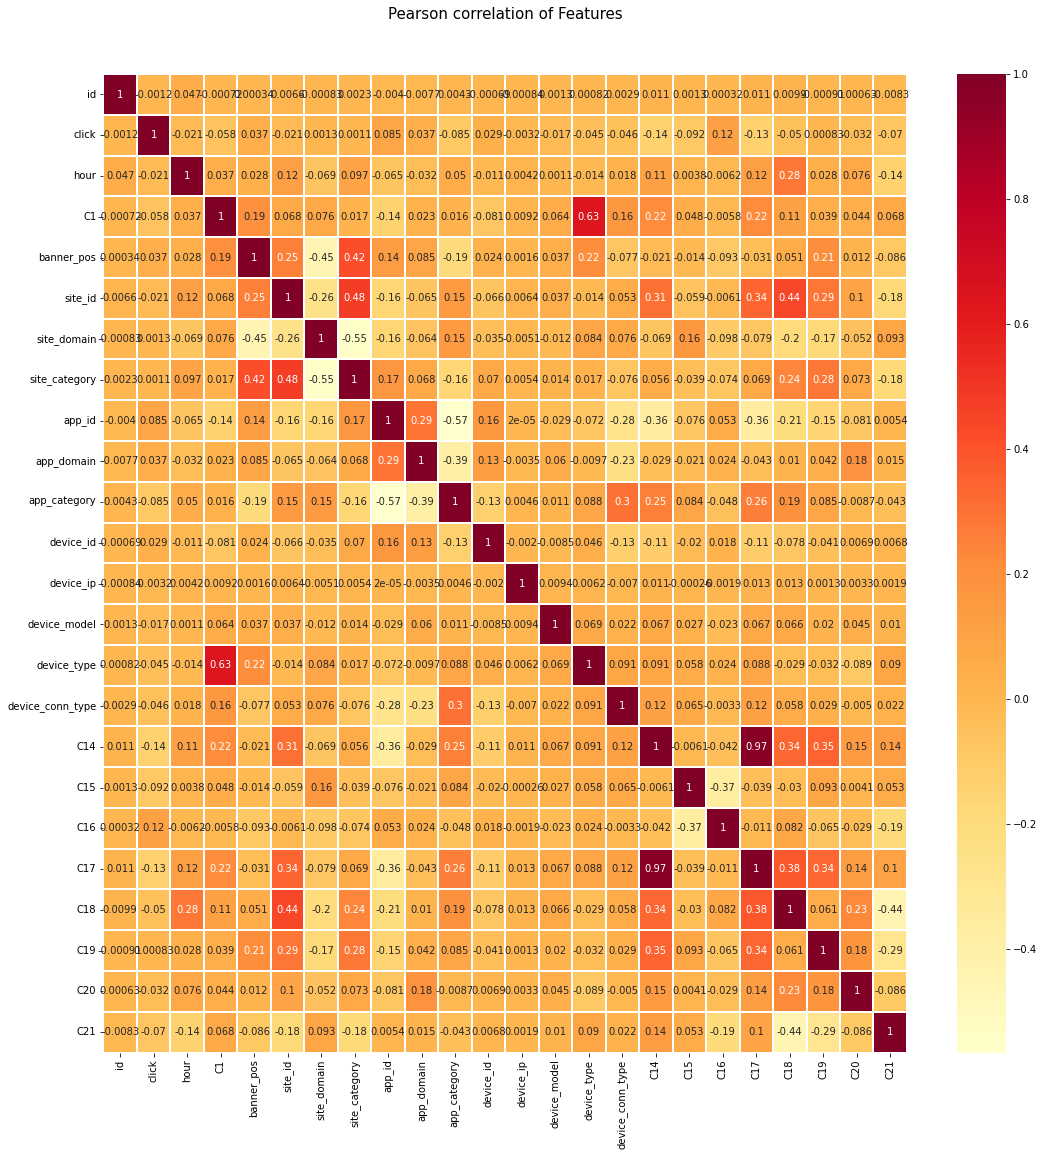

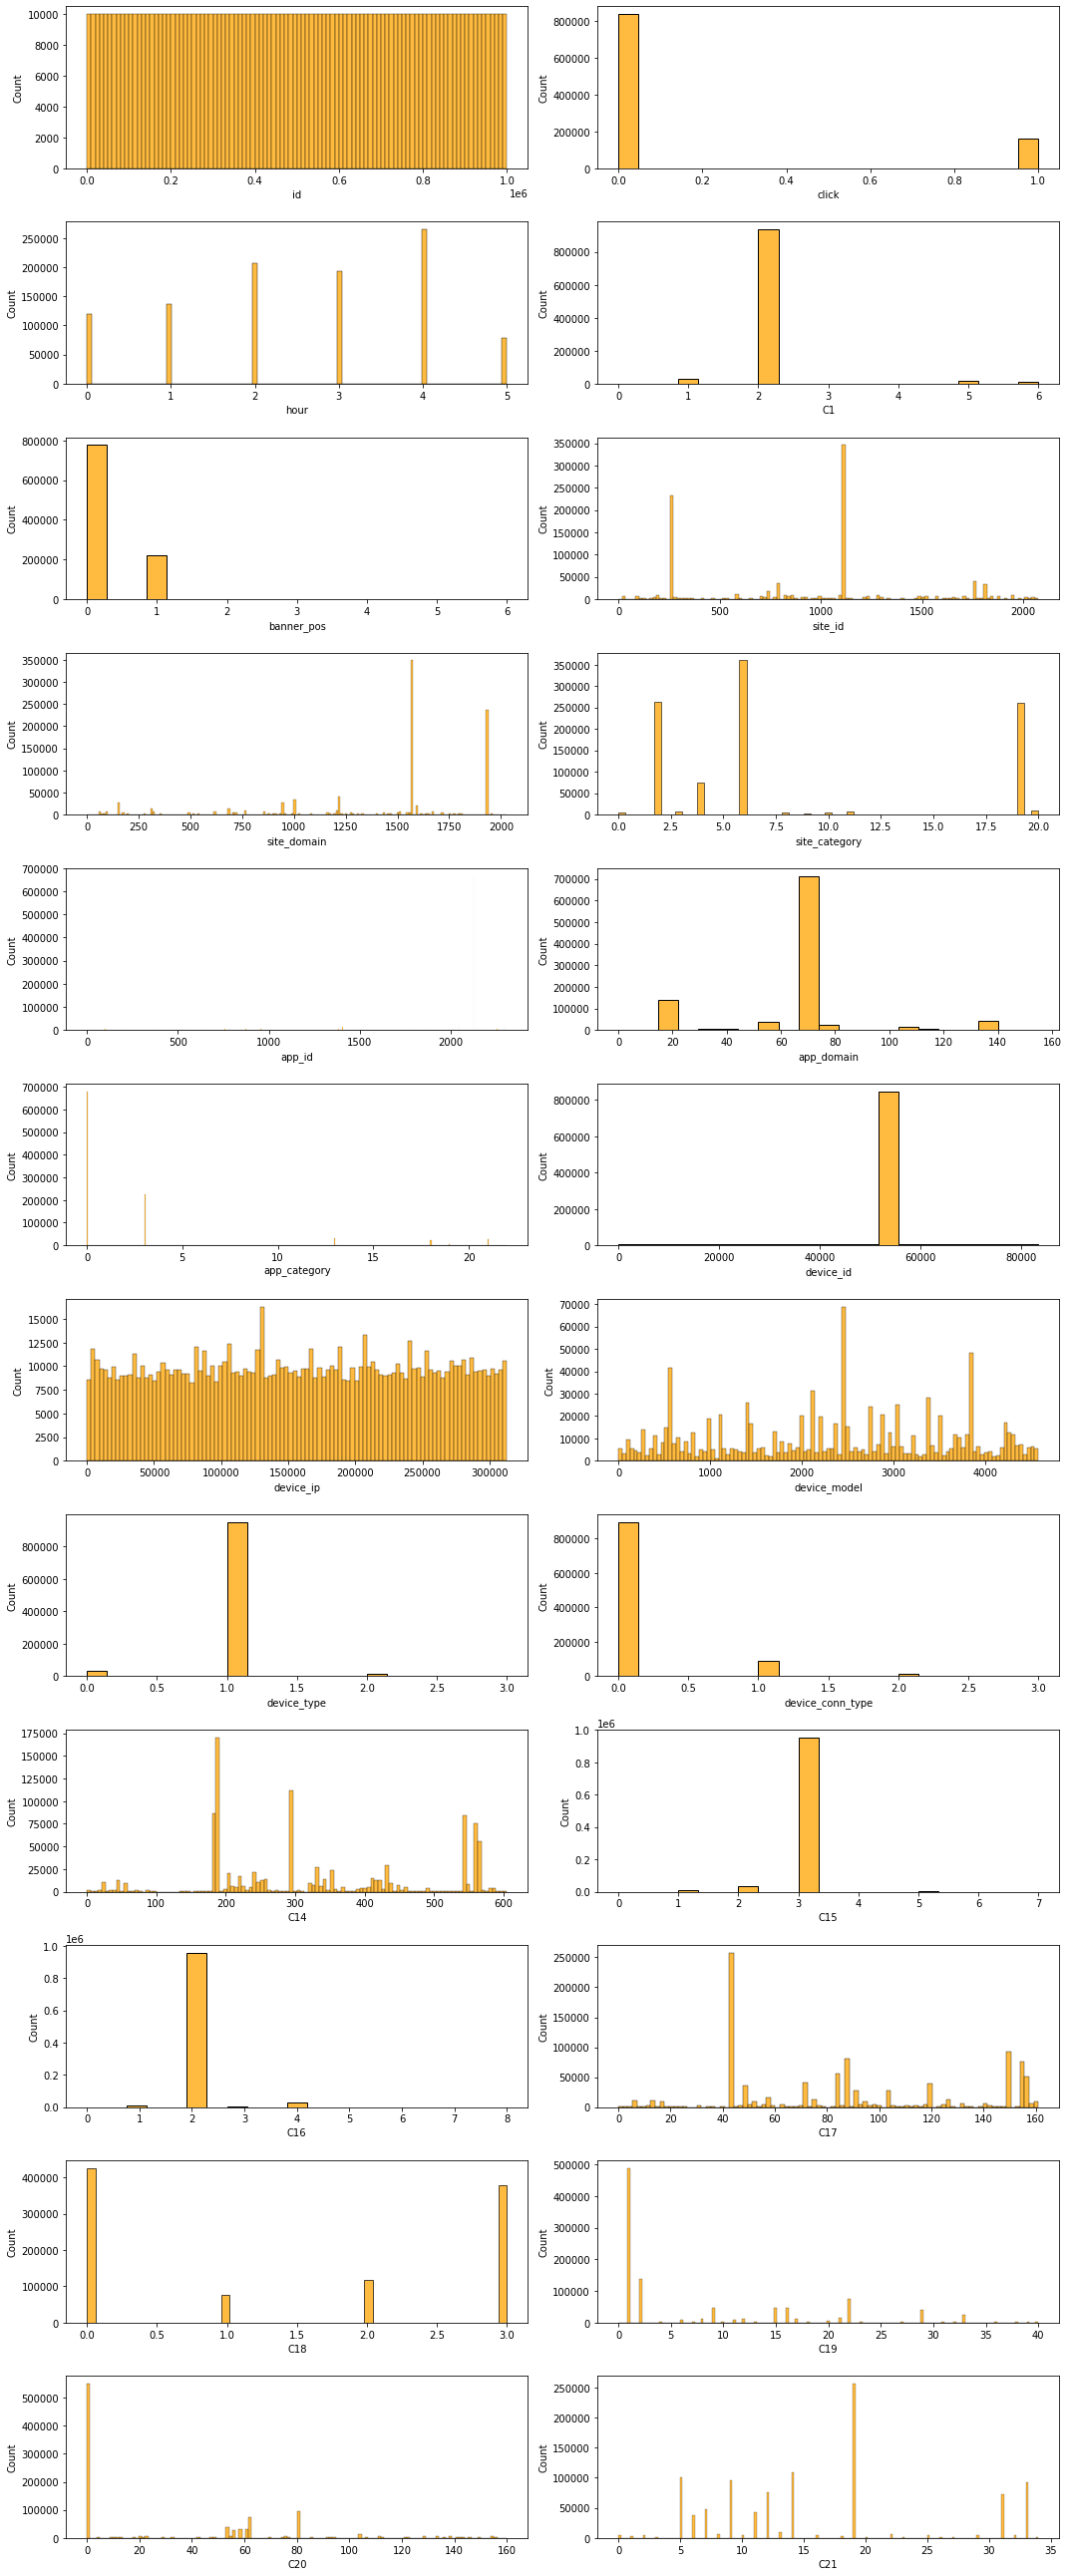

y_train data counts
0    587800
1    112200
Name: click, dtype: int64


y_train_1 data counts
0    110000
1    110000
Name: click, dtype: int64


y_train_2 data counts
0    587800
1    587800
Name: click, dtype: int64




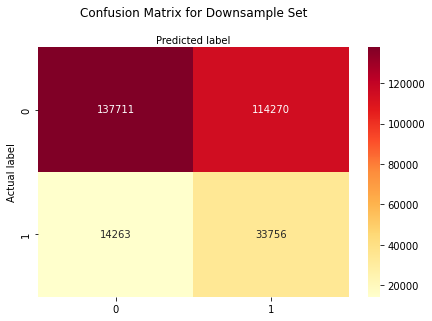

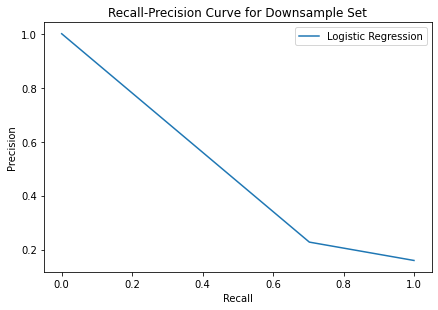

              precision    recall  f1-score   support

           0       0.91      0.55      0.68    251981
           1       0.23      0.70      0.34     48019

    accuracy                           0.57    300000
   macro avg       0.57      0.62      0.51    300000
weighted avg       0.80      0.57      0.63    300000



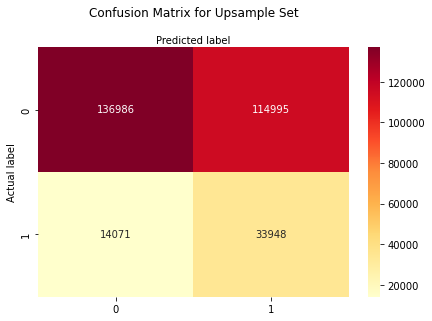

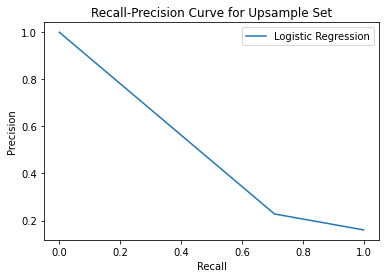

              precision    recall  f1-score   support

           0       0.91      0.54      0.68    251981
           1       0.23      0.71      0.34     48019

    accuracy                           0.57    300000
   macro avg       0.57      0.63      0.51    300000
weighted avg       0.80      0.57      0.63    300000



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math
%matplotlib inline
import seaborn as sns
from scipy import stats

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.metrics import *
from sklearn.metrics import classification_report

# pipelines
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

# data preparation
from sklearn.preprocessing import *
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, RFECV
from sklearn.utils import resample
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE


# machine learning
from sklearn import metrics
from sklearn.linear_model import *
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor



!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#upsampling function
def upsample_classes(data, target):
    
    lst = list(data[target].unique())
    
    classes = []
    for c in lst:
        classes.append(data[data[target]==c])
    
    length = 0
    class_lab = None
    for c in classes:
        if len(c)>length:
            length=len(c)
            class_lab = c
    class_lab = class_lab[target].unique()[0]
    
    regroup = pd.concat(classes)
    maj_class = regroup[regroup[target]==class_lab]

    lst.remove(class_lab)
    
    new_classes=[]
    for i in lst:
        new_classes.append(resample(data[data[target]==i],replace=True, n_samples=len(maj_class)))

    minority_classes = pd.concat(new_classes)
    upsample = pd.concat([regroup[regroup[target]==class_lab],minority_classes])

    return upsample

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/1m1HA6Hs8Vyme6uC4vRhwjD7HvccIUHr-/view?usp=share_link'
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('train.gz') 
df = pd.read_csv("train.gz", nrows=1000000)

df.info()
print("\n")
print("unique counts of site_id", len(df['site_id'].unique()))
print("----------------------")
print(df['site_id'].value_counts(normalize = True))
print("\n")
print("unique counts of site_domain", len(df['site_domain'].unique()))
print("----------------------")
print(df['site_domain'].value_counts(normalize = True))
print("\n")
print("unique counts of site_category", len(df['site_category'].unique()))
print("----------------------")
print(df['site_category'].value_counts(normalize = True))
print("\n")
print("unique counts of app_id", len(df['app_id'].unique()))
print("----------------------")
print(df['app_id'].value_counts(normalize = True))
print("\n")
print("unique counts of app_domain", len(df['app_domain'].unique()))
print("----------------------")
print(df['app_domain'].value_counts(normalize = True))
print("\n")
print("unique counts of app_category", len(df['app_category'].unique()))
print("----------------------")
print(df['app_category'].value_counts(normalize = True))
print("\n")
print("unique counts of device_id", len(df['device_id'].unique()))
print("----------------------")
print(df['device_id'].value_counts(normalize = True))
print("\n")
print("unique counts of device_ip", len(df['device_ip'].unique()))
print("----------------------")
print(df['device_ip'].value_counts(normalize = True))
print("\n")
print("unique counts of device_model", len(df['device_model'].unique()))
print("----------------------")
print(df['device_model'].value_counts(normalize = True))
print("\n")

#Given the huge number of categories, I made the decision to forgo the use of a OneHotEncoding method 
#in favour of using Label Encoding, with the understanding that Label Encoding presents a problem of potentially implying a hierarchical relationshiop between
#feature categories. Using Label Encoding also allow me to incorporate the categorical data into my correlation maxtrix, which would have been prohibitively difficult
#given the size of the data set, and the vast number of categories.

df = df.apply(LabelEncoder().fit_transform)
print(df)

corr = df.corr()
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(corr, ax=ax, annot=True, annot_kws={"size": 10},linewidths=2, cmap='YlOrRd')
plt.title("Pearson correlation of Features", y=1.05, size=15)

n = 2
plt.figure(figsize=[15,3*math.ceil(len(df.columns)/n)])

for i in range(len(df.columns)):
    plt.subplot(math.ceil(len(df.columns)/n),n,i+1)
    sns.histplot(df[df.columns[i]], color = 'orange')

plt.tight_layout()
plt.show()

#Given the extremely high correlation (0.97) between C14 and C17, C17 will be dropped from the dataframe. 
#Additionally, given the relatively high correlation (0.63) between device_type and feature C1, only C1 will be taken into consideration moving forward. 

df = df.drop(columns = ["C17", "device_type"])

X = df.drop(['click'],axis=1)
y = df.click
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 15)

print("y_train data counts")
print(y_train.value_counts())
print("\n")

#Because there are significantly fewer samples with the "1" click value, I am downsampling the test data to achieve a more balanced distribution.

X_train_1, y_train_1 = make_imbalance(X_train, y_train, sampling_strategy={0: 110000, 1: 110000}, random_state=16)

print("y_train_1 data counts")
print(y_train_1.value_counts())
print("\n")

#Alternatively, I could upsample the "1" click value to match those of the "0".

df_2 = pd.concat([X_train,y_train],axis=1)
train_balanced = (upsample_classes(df_2,'click'))
X_train_2 = train_balanced.drop(['click'],axis=1)
y_train_2 = train_balanced.click

print("y_train_2 data counts")
print(y_train_2.value_counts())
print("\n")

#And finally, I am using a Synthetic Minority Oversampling Technique to balance the data. In order to save execution time,
#I have commented out the balanced dataset achieved through SMOTE.

# smote = SMOTE(random_state = 14)
# X_train_3, y_train_3 = smote.fit_resample(X_train, y_train)

# print("y_train_3 data counts")
# print(y_train_3.value_counts())
# print("\n")

#This leaves us with three separate training samples based on the different methods of balancing the data, each of which need to be standardized.

scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train_1) 
X_train_2 = scaler.fit_transform(X_train_2)
#X_train_3 = scaler.fit_transform(X_train_3)
X_test = scaler.transform(X_test) 

logisticRegr = LogisticRegression()

logisticRegr.fit(X_train_1, y_train_1)
predictions_1 = logisticRegr.predict(X_test)
cnf_matrix_1 = metrics.confusion_matrix(y_test, predictions_1)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_1), annot=True, cmap='YlOrRd',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for Downsample Set', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

precision_1, recall_1, thresholds_1 = precision_recall_curve(y_test, predictions_1)

plt.plot(recall_1, precision_1, marker='',label="Logistic Regression")
plt.tight_layout()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve for Downsample Set")
plt.legend()
plt.show()

print(classification_report(y_test, predictions_1))

logisticRegr.fit(X_train_2, y_train_2)
predictions_2 = logisticRegr.predict(X_test)
cnf_matrix_2 = metrics.confusion_matrix(y_test, predictions_2)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_2), annot=True, cmap='YlOrRd',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for Upsample Set', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

precision_2, recall_2, thresholds_2 = precision_recall_curve(y_test, predictions_2)
print("\n")
plt.plot(recall_2, precision_2, marker='',label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve for Upsample Set")
plt.legend()
plt.show()

print(classification_report(y_test, predictions_2))

# logisticRegr.fit(X_train_standard_3, y_train_3)
# predictions_3 = logisticRegr.predict(X_test_standard_test)
# cnf_matrix_3 = metrics.confusion_matrix(y_test, predictions_3)

# class_names=[0,1] # name  of classes
# fig, ax = plt.subplots()
# tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)
# # create heatmap
# sns.heatmap(pd.DataFrame(cnf_matrix_3), annot=True, cmap='YlOrRd',fmt='g')
# ax.xaxis.set_label_position("top")
# plt.tight_layout()
# plt.title('Confusion matrix', y=1.1)
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')

# precision_3, recall_3, thresholds_3 = precision_recall_curve(y_test, predictions_3)
# print("\n")
# plt.plot(recall_3, precision_3, marker='',label="Logistic Regression")
# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.title("Recall-Precision Curve for SMOTE Set")
# plt.legend()
# plt.show()

#print(classification_report(y_test, predictions_3))





## Logistic Regression
Logistic Regression is a statistical method by which we can solve classification problems in supervised learning. In a binary classification problem, our goal is to predict an outcome strictly within the range of [0, 1], where 0 is a negative outcome, and 1 is the postive. In our specific case, we are attempting to predict whether or not a user clicks on an ad (represented as "1"), or does not (represented as the "0" class). A Linear Regression line may produce dependent variable (y) predicted values smaller than 0, or larger than 1, which are outside our range, and thus irrelevent to our needs. In contrast, a Logistic Regression model predicts the probability of our dependent variable being either 0 or 1.

Logit refers to the "log odds" probability. If the probability of an event is $\sigma$, the odds of that event can be expressed as $\frac{\sigma}{1-\sigma}$. That is, the ratio of the probability of the event occuring given some predictor ($P(y=1|x)$), to the probability that the event does not occur ($P(y=0|x)$). The logit$(\sigma)$, also expressed as $\alpha$, is equal to $\ln \frac{\sigma}{1-\sigma}$, or $\ln \frac{P(y=1|x)}{P(y=0|x)}$.

To model this probability, we need to utilize a curve for which $X \in \mathbb{R}$ and $P(y=1|x) \in [0, 1]$. Logistic Regression achieves this through the use of the Sigmoid Function:

logistic$(\alpha) = \sigma(\alpha) = \frac{1}{1+\exp(-\alpha)} = \frac{\exp(\alpha)}{1+\exp(\alpha)}$

Where $\sigma(-\alpha) = 1 - \sigma(\alpha)$.

Given our binary classification problem, we can express the posterior $P(y=1|x)$ as:

$\frac{P(x|y=1)P(y=1)}{P(x|y=1)P(y=1)+P(x|y=0)P(y=0)} = \frac{1}{1+\exp(-\alpha)} = \sigma(\alpha)$

Where $\alpha = \ln \frac{P(x|y=1)P(y=1)}{P(x|y=0)P(y=0)}$

Meaning that our Logistical Regression performance model $Pmodel(y=1|x) = \hat{y} = \sigma(w^Tx)$

Where $w^Tx = w_0 + w_1(x_1) + w_2(x_2) + w_3(x_3) + \cdots + w_k(x_k)$

In order to evaluate the performance of our model, we need to use a cost function. Due to the Sigmoid transformation, our prediction function is non-linear, we cannot use the Mean Squared Error from Linear Regression, and instead must must make use of the Cross Entropy Loss Function. 

The Binary Cross Entropy Loss Function can be expressed as:

$L(w) = L(y, \hat{y}) = -\ln p(y, w) = -[\sum_{i=1}^{m} \{y_i\ln \hat{y}_i + (1-y_i)\ln (1-\hat{y}_i)\}]$

Where $w$ is the parameters of the model, $y$ is the actual class, and $\hat{y}$ is the predicted class.

To find the gradient of $L(w)$, we can use the chain rule to say that:

$\frac{\partial L(w)}{\partial w} = \frac{\partial L(w)}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial w^Tx}\frac{\partial w^Tx}{\partial w}$

For the derivation of the first term:

$\frac{\partial L(w)}{\partial \hat{y}}= -(\frac{y}{\hat{y}}-\frac{1-y}{1-\hat{y}})$

$\hspace{1.3cm} =\frac{\hat{y}-y}{\hat{y}(1-\hat{y})}$

And the second term:

$\frac{\partial \hat{y}}{\partial w^Tx} = \frac{\partial}{\partial w^Tx}[\frac{1}{1+\exp(-w^Tx)}]$

$\hspace{1.2cm} = \frac{\partial}{\partial w^Tx} (1+\exp(-w^Tx))^{-1}$

$\hspace{1.2cm} = -(1+\exp(-w^Tx))^2(-\exp(-w^Tx))$

$\hspace{1.2cm} = \frac{\exp(-w^Tx)}{(1+\exp(-w^Tx))^2}$

$\hspace{1.2cm} = \frac{1}{1+\exp(-w^Tx)}\frac{\exp(-w^Tx)}{1+\exp(-w^Tx)}$

$\hspace{1.2cm} = \frac{1}{1+\exp(-w^Tx)}\frac{1+\exp(-w^Tx)-1}{1+\exp(-w^Tx)}$

$\hspace{1.2cm} = \frac{1}{1+\exp(-w^Tx)}(\frac{1+\exp(-w^Tx)}{1+\exp(-w^Tx)}-\frac{1}{1+\exp(-w^Tx)})$

$\hspace{1.2cm} = \frac{1}{1+\exp(-w^Tx)}(1-\frac{1}{1+\exp(-w^Tx)})$

$\hspace{1.2cm} = \hat{y}(1-\hat{y})$

And the derivation of the third and final term:

$\frac{\partial w^Tx}{\partial w} = x$

Meaning that the derivation of $\frac{\partial L(w)}{\partial w}$ can be written as:

$\frac{\hat{y}-y}{\hat{y}(1-\hat{y})}\hat{y}(1-\hat{y})x = (\hat{y}-y)x$

$\hspace{3.7cm} = \nabla_wL$

## Precision-Recall Curve

There are four possible outcomes from a binary classification problem. 

First, if $\hat{y} = 1$, and the actual value of $y=1$, then that prediction is considered to be a True Positive. Similarly, if $\hat{y} = 0$ and $y = 0$, that outcome is called a True Negative. On the other hand, if $\hat{y} = 1$ but $y = 0$, that is a False Positive, while the event in which $\hat{y} = 0$ but $y=1$ is called a False Negative.

These outcomes can be used to determine a number of other metrics. including Recall and Precision.

Recall is also called the True Positive Rate, and can be thought of as the probability of detection. It can be calculated as a ratio of the number of True Positive predictions over the total number of instances for which $y=1$.

Looking at our CTR predictions using a downsampled training set, our recall was $\frac{33713}{48019} = \approx 0.702$.

Precision, also referred to as the Positive Predictive Value, tells us what portion of positive predictions were truly positive. This is determined by taking the ratio of True Positive predictions over the total number of instances for which $\hat{y} =1$.

Looking at our CTR predictions using a downsampled training set, our precision was $\frac{33713}{148006} = \approx 0.228$, which is very poor.

The Precision-Recall Curve shows us the relationship between the model's precision and recall. Ideally, a model will have high recall and high precision, however, more often than not, one is sacrificed for the other. The Precision-Recall Curve shows us the degree of those trade-offs at different threshholds. 



